In [1]:
from numpy import *

In [2]:
def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t')) - 1
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat

In [3]:
# 标准回归函数
def standRegres(xArr, yArr):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    xTx = xMat.T * xMat
    if linalg.det(xTx) == 0.0:
        print "This matrix is singular, cannot do inverse"
        return
    ws = xTx.I * (xMat.T * yMat)
    return ws

In [4]:
# 局部加权线性回归
def lwlr(testPoint, xArr, yArr, k=1.0):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    m = shape(xMat)[0]
    weights = mat(eye((m)))
    # 随着样本点与待预测点距离递增，权重将以指数级递减
    for j in range(m):
        diffMat = testPoint - xMat[j, :]
        weights[j, j] = exp(diffMat * diffMat.T / (-2.0 * k ** 2))
    xTx = xMat.T * (weights * xMat)
    if linalg.det(xTx) == 0.0:
        print "This matrix is singular, cannot do inverse"
        return
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

In [5]:
def lwlrTest(testArr, xArr, yArr, k=1.0):
    m = shape(testArr)[0]
    yHat = zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i], xArr, yArr, k)
    return yHat

In [6]:
# 岭回归
def ridgeRegress(xMat, yMat, lam=0.2):
    xTx = xMat.T * xMat
    denom = xTx + eye(shape(xMat)[1]) * lam
    if linalg.det(denom) == 0.0:
        print "This matrix is singular, cannot do inverse"
        return
    ws = denom.I * (xMat.T * yMat)
    return ws

In [7]:
def regularize(xMat):#regularize by columns
    inMat = xMat.copy()
    inMeans = mean(inMat,0)   #calc mean then subtract it off
    inVar = var(inMat,0)      #calc variance of Xi then divide by it
    inMat = (inMat - inMeans)/inVar
    return inMat

In [8]:
def ridgeTest(xArr, yArr):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    yMean = mean(yMat, 0)
    yMat = yMat - yMean
    xMat = regularize(xMat)
#     xMean = mean(xMat, 0)
#     xVar = var(xMat, 0)
#     xMat = (xMat - xMean) / xVar
    numTestPts = 30
    wMat = zeros((numTestPts, shape(xMat)[1]))
    for i in range(numTestPts):
        ws = ridgeRegress(xMat, yMat, exp(i-10))
        wMat[i,:] = ws.T
    return wMat

In [9]:
# 向前逐步回归
def stageWise(xArr, yArr, eps=0.01, numIt=100):
    xMat = mat(xArr); yMat = mat(yArr).T
    yMean = mean(yMat, 0)
    yMat = yMat - yMean
    xMat = regularize(xMat)
    m,n = shape(xMat)
    returnMat = zeros((numIt,n))
    ws = zeros((n,1)); wsTest = ws.copy(); wsMax = ws.copy()
    for i in range(numIt):
#         print ws.T
        lowestError = inf
        for j in range(n):
            for sign in [-1,1]:
                wsTest = ws.copy()
                wsTest[j] += eps * sign
                yTest = xMat * wsTest
                rssE = rssError(yMat.A, yTest.A)
                if rssE < lowestError:
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i,:] = ws.T
    return returnMat

In [10]:
# 标准线性回归
# 读取数据
xArr, yArr = loadDataSet('ex0.txt')
ws = standRegres(xArr, yArr)
xMat = mat(xArr)
yMat = mat(yArr)
yHat = xMat * ws
# 画图
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:, 1].flatten().A[0], yMat.T[:, 0].flatten().A[0], s=2, c='red')
xCopy = xMat.copy()
xCopy.sort(0)
yHat = xCopy * ws
ax.plot(xCopy[:, 1], yHat)
plt.show()

In [11]:
# 局部加权回归绘图
def printReg(k):
    yHat = lwlrTest(xArr, xArr, yArr, k)
    srtInd = xMat[:, 1].argsort(0)
    xSrot = xMat[srtInd][:, 0, :]

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(xSrot[:, 1], yHat[srtInd])
    ax.scatter(xMat[:, 1].flatten().A[0], yMat.T[:, 0].flatten().A[0], s=2, c='red')
    plt.show()

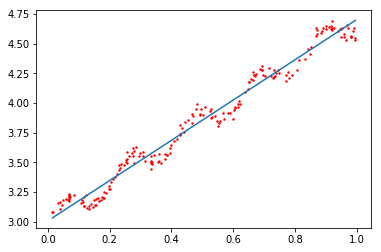

In [12]:
printReg(1)

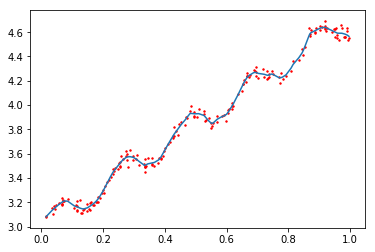

In [13]:
printReg(0.01)

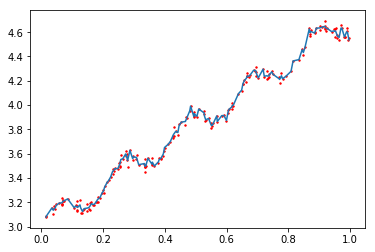

In [14]:
printReg(0.003)

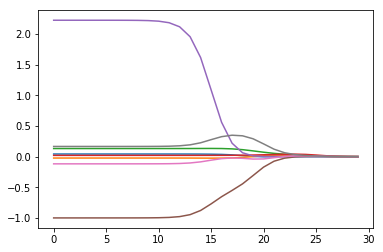

In [34]:
# 
# 预测鲍鱼年龄，使用岭回归
# 
abX, abY = loadDataSet('abalone.txt')
ridgeWeights = ridgeTest(abX, abY)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ridgeWeights)
plt.show()

In [35]:
def rssError(yArr, yHatArr):
    return ((yArr - yHatArr)**2).sum()

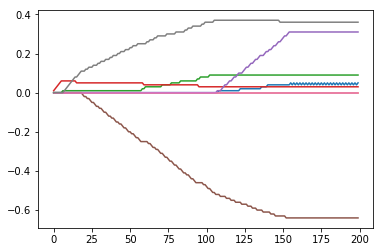

In [46]:
stw = stageWise(abX, abY, 0.01, 200)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(stw)
plt.show()